In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('qAFKS.csv', sep=';')
dt

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,0,AFKS,2008-01-10,41.550,42.340
1,1,1,AFKS,2008-01-11,42.350,46.200
2,2,1,AFKS,2008-01-12,42.350,46.200
3,3,1,AFKS,2008-01-13,42.350,46.200
4,4,2,AFKS,2008-01-14,46.200,44.750
...,...,...,...,...,...,...
4643,4643,3190,AFKS,2020-09-26,21.180,21.152
4644,4644,3190,AFKS,2020-09-27,21.180,21.152
4645,4645,3191,AFKS,2020-09-28,21.206,21.223
4646,4646,3192,AFKS,2020-09-29,21.209,21.184


In [3]:
dataset = pd.read_csv('qAFKS.csv', ';', index_col=['DATE'], parse_dates=['DATE'], dayfirst=True)

## Избавляемся от ненужных столбцов

In [4]:
dataset = dataset.drop(['COMPANY'], axis=1)

In [5]:
dataset = dataset.drop(['CLOSE'], axis=1)

In [6]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [7]:
dataset = dataset.drop(['Unnamed: 0.1'], axis=1)

In [8]:
dataset

,OPEN
DATE,
2008-01-10,41.550
2008-01-11,42.350
2008-01-12,42.350
2008-01-13,42.350
2008-01-14,46.200
...,...
2020-09-26,21.180
2020-09-27,21.180
2020-09-28,21.206


# Строим график

In [9]:
dt = dataset

<AxesSubplot:xlabel='DATE'>

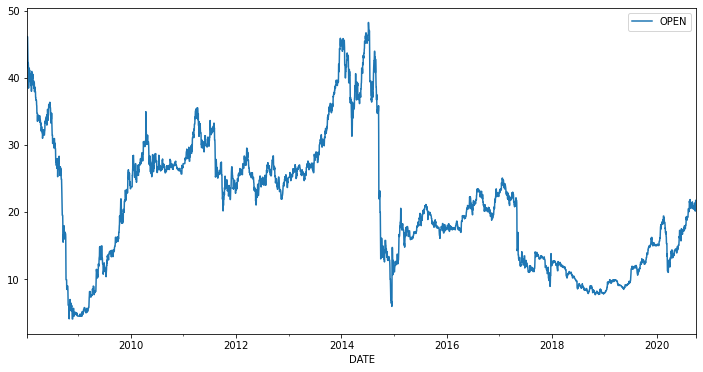

In [10]:
dt.plot(figsize=(12,6))

### Данные с недельным интервалом

<AxesSubplot:xlabel='DATE'>

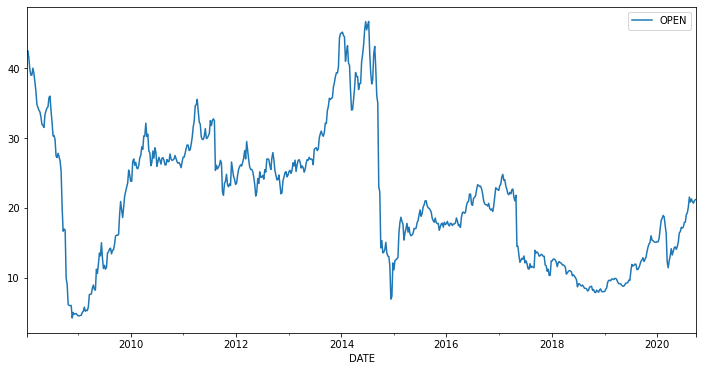

In [11]:
dtw = dt.resample('W').median()
dtw.plot(figsize=(12,6))

In [12]:
dtw

,OPEN
DATE,
2008-01-13,42.350
2008-01-20,42.510
2008-01-27,41.490
2008-02-03,39.800
2008-02-10,39.001
...,...
2020-09-06,20.896
2020-09-13,20.659
2020-09-20,20.998


In [13]:
dtw.to_csv('week_AFSK.csv', sep=';')

### Гистограмма с полными данными

,OPEN
count,4648.000000
mean,21.175171
std,9.485385
min,4.097000
25%,13.055000
50%,20.830000
75%,26.943750
max,48.296000


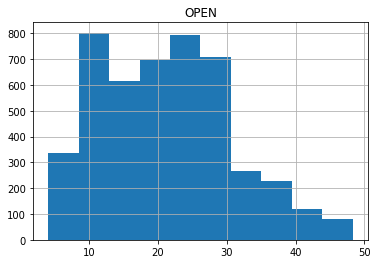

In [14]:
idt = dt.describe()
dt.hist()
idt

### Гистограмма с недельным интервалом

,OPEN
count,665.000000
mean,21.171887
std,9.503422
min,4.210000
25%,13.055000
50%,20.896000
75%,26.907000
max,46.697000


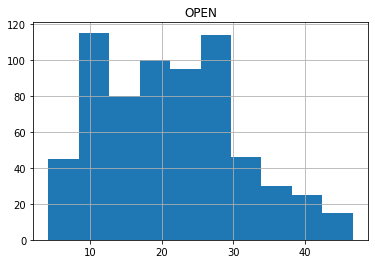

In [15]:
idtw = dtw.describe()
dtw.hist()
idtw

# Расчет коэффициента вариации

### Полные данные

In [16]:
V = idt.loc['std']/idt.loc['mean']

In [17]:
V

OPEN    0.447948
dtype: float64

### Недельные данные

In [18]:
Vw = idtw.loc['std']/idtw.loc['mean']

In [19]:
Vw

OPEN    0.44887
dtype: float64

# Тест Харки-Бера

### Полные данные

In [20]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(dt, axis=1)
jb_test

(array([0.375, 0.375, 0.375, ..., 0.375, 0.375, 0.375]),
 array([0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [21]:
a = np.vstack([jb_test])
a

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
idt = SimpleTable(a, row)
idt

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Недельные данные


In [23]:
roww =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_testw = sm.stats.stattools.jarque_bera(dtw, axis=1)
jb_testw

(array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
      

In [24]:
aw = np.vstack([jb_testw])
aw

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
idtw = SimpleTable(aw, roww)
idtw

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Тест Дикки-Фуллера

### Полные данные

In [26]:
dt2 = dt.dropna(how='any')

In [27]:
dt2

,OPEN
DATE,
2008-01-10,41.550
2008-01-11,42.350
2008-01-12,42.350
2008-01-13,42.350
2008-01-14,46.200
...,...
2020-09-26,21.180
2020-09-27,21.180
2020-09-28,21.206


In [28]:
test = sm.tsa.adfuller(dt2)

In [29]:
test_result = [{'adf: ': test[0], 'p-value: ': test[1], 'Critical values: ': test[4]}]
test_result = pd.DataFrame(test_result)
if test[0] > test[4]['5%']:
    test_result[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result[3] = 'единичных корней нет, ряд стационарен'

In [30]:
test_result

,adf:,p-value:,Critical values:,3
0,-2.761445,0.063996,"{'1%': -3.431764382259551, '5%': -2.8621649928...","есть единичные корни, ряд не стационарен"


### Недельные данные

In [31]:
dt2w = dtw.dropna(how='any')

In [32]:
dt2w

,OPEN
DATE,
2008-01-13,42.350
2008-01-20,42.510
2008-01-27,41.490
2008-02-03,39.800
2008-02-10,39.001
...,...
2020-09-06,20.896
2020-09-13,20.659
2020-09-20,20.998


In [33]:
testw = sm.tsa.adfuller(dt2w)

In [34]:
test_resultw = [{'adf: ': test[0], 'p-value: ': testw[1], 'Critical values: ': test[4]}]
test_resultw = pd.DataFrame(test_resultw)
if testw[0] > testw[4]['5%']:
    test_resultw[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_resultw[3] = 'единичных корней нет, ряд стационарен'

In [35]:
test_resultw

,adf:,p-value:,Critical values:,3
0,-2.761445,0.051367,"{'1%': -3.431764382259551, '5%': -2.8621649928...","есть единичные корни, ряд не стационарен"


### Проверка порядка интегрированного ряда

### Полные данные

In [36]:
dt2diff = dt.diff(periods=1).dropna()

In [37]:
test2 = sm.tsa.adfuller(dt2diff)

In [38]:
test_result2 = [{'adf: ': test2[0], 'p-value: ': test2[1], 'Critical values: ': test2[4]}]
test_result2 = pd.DataFrame(test_result2)
if test2[0] > test2[4]['5%']:
    test_result2[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2[3] = 'единичных корней нет, ряд стационарен'

In [39]:
test_result2

,adf:,p-value:,Critical values:,3
0,-12.908753,4.099422e-24,"{'1%': -3.431764382259551, '5%': -2.8621649928...","единичных корней нет, ряд стационарен"


### Недельные данные

In [40]:
dt2diffw = dtw.diff(periods=1).dropna()

In [41]:
test2w = sm.tsa.adfuller(dt2diffw)

In [42]:
test_result2w = [{'adf: ': test2w[0], 'p-value: ': test2w[1], 'Critical values: ': test2w[4]}]
test_result2w = pd.DataFrame(test_result2w)
if test2w[0] > test2w[4]['5%']:
    test_result2w[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2w[3] = 'единичных корней нет, ряд стационарен'

In [43]:
test_result2w

,adf:,p-value:,Critical values:,3
0,-14.256562,1.450598e-26,"{'1%': -3.4402666733359175, '5%': -2.865915811...","единичных корней нет, ряд стационарен"


### Проверка мат ожидания

In [44]:
dt2diff.index[len(dt2diff.index)/3]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
m = dt2diff.index[len(dt2diff.index)/2+1]

In [45]:
r1 = sm.stats.DescrStatsW(dt2diff[m:])
r2 = sm.stats.DescrStatsW(dt2diff[:m])
prov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]
prov

NameError: name 'm' is not defined

### Полные данные

<AxesSubplot:xlabel='DATE'>

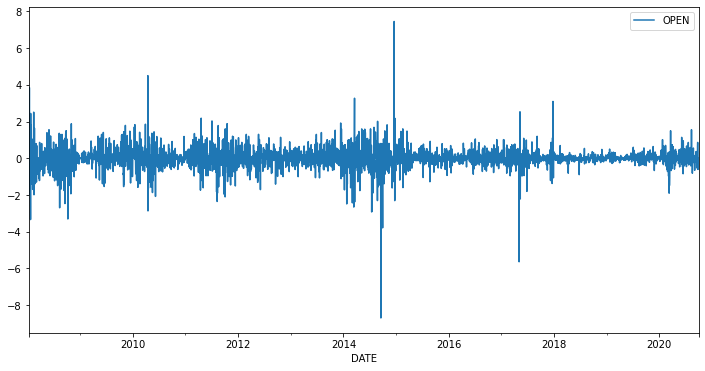

In [46]:
dt2diff.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

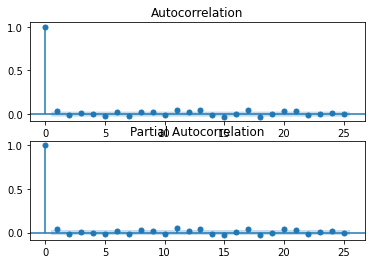

In [47]:
ig = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt2diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt2diff, lags=25, ax=ax2)

### Недельные данные

<AxesSubplot:xlabel='DATE'>

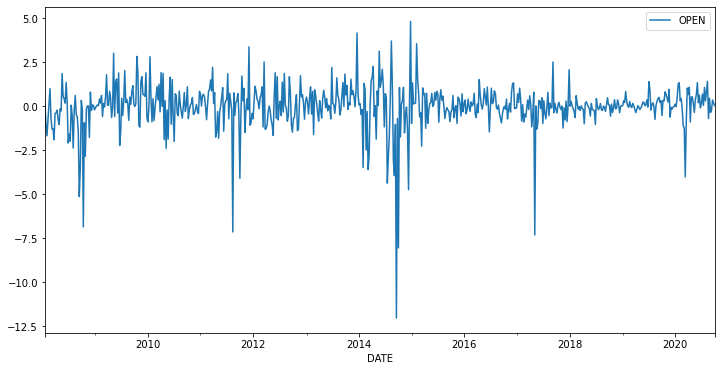

In [48]:
dt2diffw.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

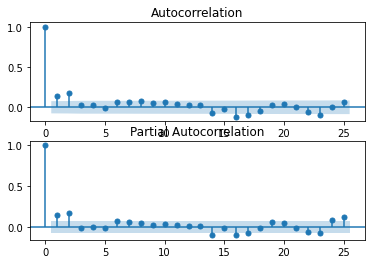

In [49]:
igw = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt2diffw.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt2diffw, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают

### Построение ARIMA модели

### Недельные данные

In [50]:
src_data_modelw = dtw[:'2020-09-29']
modelw =  sm.tsa.arima.ARIMA(src_data_modelw, order=(1,1,1), freq='W').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

In [51]:
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                  664
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1088.085
Date:                Mon, 26 Oct 2020   AIC                           2182.170
Time:                        19:43:43   BIC                           2195.660
Sample:                    01-13-2008   HQIC                          2187.398
                         - 09-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7363      0.085      8.682      0.000       0.570       0.902
ma.L1         -0.6036      0.107     -5.655      0.000      -0.813      -0.394
sigma2         1.5595      0.032     48.961      0.000       1.497       1.622
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              8554.90
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Полные данные (модель не строится)

In [52]:
src_data_model = dt[:'2020-09-30']
model =  sm.tsa.arima.ARIMA(src_data_model, order=(1,1,1), freq='D').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                 4648
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3519.729
Date:                Mon, 26 Oct 2020   AIC                           7045.458
Time:                        19:43:44   BIC                           7064.790
Sample:                    01-10-2008   HQIC                          7052.259
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2799      0.236     -1.188      0.235      -0.742       0.182
ma.L1          0.3182      0.235      1.355      0.176      -0.142       0.779
sigma2         0.2663      0.002    160.180      0.000       0.263       0.270
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            255224.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q-тест Льюинга-Бокса

In [54]:
type(model.resid)

pandas.core.series.Series

In [55]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [56]:
q_test

(array([ 1.00000000e+00,  1.11851239e-02,  6.27506721e-05,  3.44703768e-03,
         5.43778618e-02, -2.45159130e-02,  1.51888952e-03, -3.62554057e-02,
         8.10735325e-03,  1.03352573e-02, -4.68988678e-03,  1.55224323e-02,
        -3.76091051e-02,  5.48761551e-02, -2.42190376e-02,  1.56955160e-02,
        -1.77237550e-03,  2.14359747e-02, -2.72182429e-02,  1.07129453e-02,
        -4.07090497e-03,  1.83548863e-02, -1.07725025e-02,  2.47479933e-03,
         6.41694992e-03,  1.33119223e-02,  5.88532937e-03, -3.80974637e-02,
         2.50951287e-02, -3.35962255e-03, -2.38364756e-03,  1.38172816e-03,
        -2.34255786e-02,  7.80746782e-03,  3.85929668e-02, -2.45910216e-03,
        -1.91032057e-02, -2.10815716e-03, -1.02657348e-02,  2.19899162e-02,
        -1.69046129e-02]),
 array([ 0.58187272,  0.58189104,  0.63717835, 14.39884755, 17.19664668,
        17.20738821, 23.32882038, 23.63498802, 24.13265324, 24.23515068,
        25.35820698, 31.95239983, 45.99464928, 48.73040178, 49.8796

In [57]:
pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,0.581873,0.445579
1,0.581891,0.747556
2,0.637178,0.887871
3,14.398848,0.006125
4,17.196647,0.004142
5,17.207388,0.008551
6,23.328820,0.001494
7,23.634988,0.002638
8,24.132653,0.004096
9,24.235151,0.007000


### Рассчет коэффициента детерминации

In [75]:
pred = model.predict('2020-09-30','2020-10-15', typ='levels')

In [76]:
trn = dt['2020-09-15':]

In [77]:
trn.shape

(16, 1)

In [78]:
pred.shape

(16,)

In [79]:
pred

2020-09-30    21.209525
2020-10-01    21.182877
2020-10-02    21.183191
2020-10-03    21.183103
2020-10-04    21.183128
2020-10-05    21.183121
2020-10-06    21.183123
2020-10-07    21.183122
2020-10-08    21.183122
2020-10-09    21.183122
2020-10-10    21.183122
2020-10-11    21.183122
2020-10-12    21.183122
2020-10-13    21.183122
2020-10-14    21.183122
2020-10-15    21.183122
Freq: D, Name: predicted_mean, dtype: float64

In [80]:
pred = pred.to_frame()


In [81]:
pred.shape

(16, 1)

In [82]:
pred

,predicted_mean
2020-09-30,21.209525
2020-10-01,21.182877
2020-10-02,21.183191
2020-10-03,21.183103
2020-10-04,21.183128
2020-10-05,21.183121
2020-10-06,21.183123
2020-10-07,21.183122
2020-10-08,21.183122
2020-10-09,21.183122


In [83]:
pred.rename(columns={'predicted_mean': 'OPEN'}, inplace=True)

In [84]:
trn

,OPEN
DATE,
2020-09-15,20.998
2020-09-16,21.010
2020-09-17,21.375
2020-09-18,20.857
2020-09-19,20.635
2020-09-20,20.635
2020-09-21,20.719
2020-09-22,20.182
2020-09-23,20.799


In [85]:
r2 = r2_score(trn, pred)

In [86]:
r2

-0.14104320423290262

In [87]:
metrics.rmse(trn,pred)

0.41696296522180093

In [88]:
metrics.mae(trn,pred)

0.3117851342105422

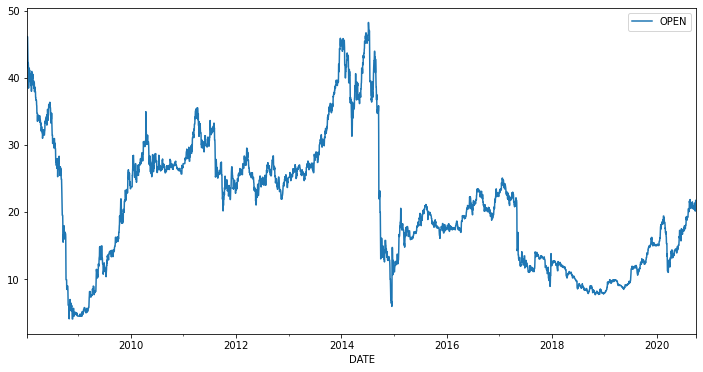

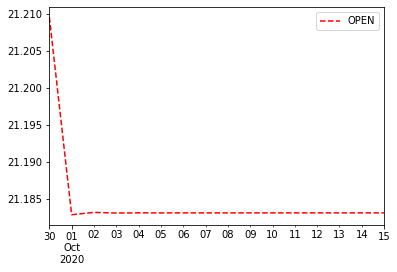

In [89]:
dt.plot(figsize=(12,6))
pred.plot(style='r--')
plt.show()

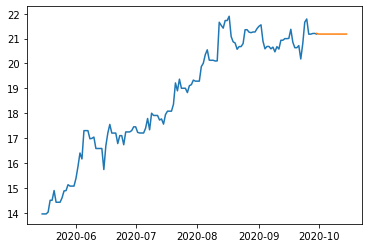

In [90]:
plt.plot(dt['2020-05-15':])
plt.plot(pred)
plt.show()